<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Gradient Boosting

## Setting up the Environment

For this laboratory exercise, you will need to install the Anaconda package & environment manager. We will install a minimal distribution, [Miniconda](https://docs.conda.io/projects/miniconda/en/latest/). Choose the adequate distribution for your operating system, download and install it.

Or use the following commands:

### Windows
```shell
curl https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe -o miniconda.exe
start /wait "" miniconda.exe /S
del miniconda.exe
```

### Linux
```shell
mkdir -p ~/miniconda3
wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O ~/miniconda3/miniconda.sh
bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3
rm -rf ~/miniconda3/miniconda.sh
```

### macOS

```shell
mkdir -p ~/miniconda3
curl https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-arm64.sh -o ~/miniconda3/miniconda.sh
bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3
rm -rf ~/miniconda3/miniconda.sh
```

For both Linux and macOS after installing, initialize your newly-installed Miniconda. The following commands initialize for bash and zsh shells:

```shell
~/miniconda3/bin/conda init bash
~/miniconda3/bin/conda init zsh
```


Once you have installed miniconda, run the following commands to create an environment:
```bash
conda create --name myenv
```

'myenv' is the name of the environment, you can change the name however you want.c

When conda asks you to proceed, type y

After successfully creating the environment, activate it with the following command:
```bash
conda activate myenv
```

For more detailed information you can read the [documentation](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands).

Now, once the environment is activated, proceed to install the required libraries.

```bash
pip install numpy pandas scikit-learn xgboost matplotlib seaborn gdown
```

In the next step, we need to add the environment to jupyter. Use the following commands to install ipykernel and add the environment to ipykernel.

```bash
pip install ipykernel
```
```bash
python -m ipykernel install --name=myenv
```


Next, start Jupyter Notebook, download this starter notebook and open it. On the dropdown menu in the Kernel tab choose the name of the environment you created, like in the picture below.


![jupyter](https://drive.google.com/uc?export=view&id=1N-27jjlIgpTILi-_6lny7ng8sE52SAZx)


## Download and Read the Dataset

run the code below for downloading the dataset

In [94]:
!gdown 1boIax8d9Sat6OJzkiIjjpqmtSZKuRYrx

Downloading...
From: https://drive.google.com/uc?id=1boIax8d9Sat6OJzkiIjjpqmtSZKuRYrx
To: c:\Users\Ace\PycharmProjects\pythonProject\DS\labs\3_Decision_Tree_and_Gradient_Boosting\ElectricCarData.csv

  0%|          | 0.00/8.20k [00:00<?, ?B/s]
100%|██████████| 8.20k/8.20k [00:00<00:00, 13.5MB/s]


### Import the required libraries

In [95]:
!pip install numpy pandas scikit-learn xgboost matplotlib seaborn gdown


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Read the dataset

CONTEXT:
This is a dataset of electric vehicles.

It contains the following columns:


*   Brand
*   Model
*   AccelSec - Acceleration as 0-100 km/h
*   TopSpeed_KmH - The top speed in km/h
*   Range_Km - Range in km
*   Efficiency_WhKm - Efficiency Wh/km
*   FastCharge_KmH - Charge km/h
*   RapidCharge - Yes / No
*   PowerTrain - Front, rear, or all wheel drive
*   PlugType
*   BodyStyle - Basic size or style
*   Segment - Market segment
*   Seats - Number of seats
*   PriceEuro - Price in Germany before tax incentives




TASK:
Predict the target 'PriceEuro' and compare the performance of the DecisionTreeRegressor and the XGBRegressor models.

In [3]:
data = pd.read_csv('./ElectricCarData.csv')

In [5]:
data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [6]:
data.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [7]:
data['RapidCharge'].value_counts()

RapidCharge
Yes    98
No      5
Name: count, dtype: int64

In [8]:
data['PowerTrain'].value_counts()

PowerTrain
AWD    41
FWD    37
RWD    25
Name: count, dtype: int64

In [9]:
data['PlugType'].value_counts()

PlugType
Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: count, dtype: int64

In [10]:
data['BodyStyle'].value_counts()

BodyStyle
SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: count, dtype: int64

In [11]:
data['Segment'].value_counts()

Segment
C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: count, dtype: int64

### Encode string variables

In [12]:
def label_data(data:pd.DataFrame, columns:list):
  encoder = LabelEncoder()
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = encoder.fit_transform(data_copy[[column]].astype(str).values.ravel())

    # if 'nan' in encoder.classes_:
    #   data_copy.loc[data_copy[column] == -1, column] = np.nan
  return data_copy

In [13]:
def drop_data(data:pd.DataFrame, columns:list):
  data_copy = data.copy()
  data_copy.drop(columns, axis=1, inplace=True)
  return data_copy

In [14]:
def scale_data_standard(data: pd.DataFrame, columns: list):
    scaler = StandardScaler()
    data_copy = data.copy()
    
    # Scale specified columns
    for column in columns:
        data_copy[column] = scaler.fit_transform(data_copy[[column]])
    
    return data_copy

In [15]:
def simple_impute_data(data:pd.DataFrame, columns:list, strategy:str):
  imputer = SimpleImputer(strategy=strategy)
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = imputer.fit_transform(data_copy[[column]])
  return data_copy
     

In [16]:
data = label_data(data, ['RapidCharge', 'PowerTrain', 'PlugType','BodyStyle', 'Segment'])

In [17]:
data = label_data(data, ['Brand'])

In [18]:
data = drop_data(data, ['Model'])

In [19]:
data.head()

,Brand,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,4.6,233,450,161,940,1,0,2,7,3,5,55480
1,31,10.0,160,270,167,250,1,2,2,1,2,5,30000
2,23,4.7,210,400,181,620,1,0,2,2,3,5,56440
3,2,6.8,180,360,206,560,1,2,2,6,3,5,68040
4,9,9.5,145,170,168,190,1,2,2,1,1,4,32997


In [20]:
data['FastCharge_KmH'].value_counts()

FastCharge_KmH
230    6
540    5
440    5
380    5
-      5
560    4
190    4
470    4
170    3
260    3
210    3
420    3
220    2
590    2
710    2
490    2
270    2
650    2
620    2
550    2
340    2
480    2
330    2
390    2
350    2
450    2
940    1
850    1
930    1
780    1
250    1
610    1
570    1
240    1
910    1
730    1
920    1
900    1
520    1
410    1
770    1
430    1
890    1
360    1
460    1
810    1
290    1
740    1
510    1
320    1
500    1
Name: count, dtype: int64

In [21]:
data_copy = data.copy()
data_copy.head()

,Brand,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,4.6,233,450,161,940,1,0,2,7,3,5,55480
1,31,10.0,160,270,167,250,1,2,2,1,2,5,30000
2,23,4.7,210,400,181,620,1,0,2,2,3,5,56440
3,2,6.8,180,360,206,560,1,2,2,6,3,5,68040
4,9,9.5,145,170,168,190,1,2,2,1,1,4,32997


In [22]:
data_copy['FastCharge_KmH'] = pd.to_numeric(data['FastCharge_KmH'], errors='coerce')

In [36]:
print(data['FastCharge_KmH'])

0      940
1      250
2      620
3      560
4      190
      ... 
98     440
99     540
100    440
101    450
102    480
Name: FastCharge_KmH, Length: 103, dtype: object


In [33]:
data_copy.head()

,Brand,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,4.6,233,0.886862,-0.957247,2.413510,1,0,2,7,3,5,55480
1,31,10.0,160,-0.548531,-0.753325,-1.032469,1,2,2,1,2,5,30000
2,23,4.7,210,0.488142,-0.277506,0.815375,1,0,2,2,3,5,56440
3,2,6.8,180,0.169166,0.572171,0.515725,1,2,2,6,3,5,68040
4,9,9.5,145,-1.345971,-0.719338,-1.332119,1,2,2,1,1,4,32997


In [24]:
data_copy = scale_data_standard(data_copy, ['FastCharge_KmH'])

In [25]:
data_copy = scale_data_standard(data_copy, ['Range_Km'])

In [26]:
data_copy = scale_data_standard(data_copy, ['Efficiency_WhKm'])

In [27]:
data_copy.head()

,Brand,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,4.6,233,0.886862,-0.957247,2.413510,1,0,2,7,3,5,55480
1,31,10.0,160,-0.548531,-0.753325,-1.032469,1,2,2,1,2,5,30000
2,23,4.7,210,0.488142,-0.277506,0.815375,1,0,2,2,3,5,56440
3,2,6.8,180,0.169166,0.572171,0.515725,1,2,2,6,3,5,68040
4,9,9.5,145,-1.345971,-0.719338,-1.332119,1,2,2,1,1,4,32997


<Axes: ylabel='Efficiency_WhKm'>

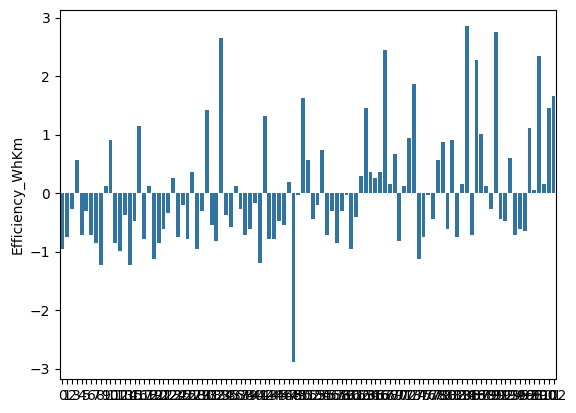

In [28]:
#data['FastCharge_KmH'].hist()
sns.barplot(data_copy['Efficiency_WhKm'])

## Split the dataset for training and testing in ratio 80:20

In [29]:
data_copy.isnull().sum()

Brand              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     5
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

<Axes: ylabel='FastCharge_KmH'>

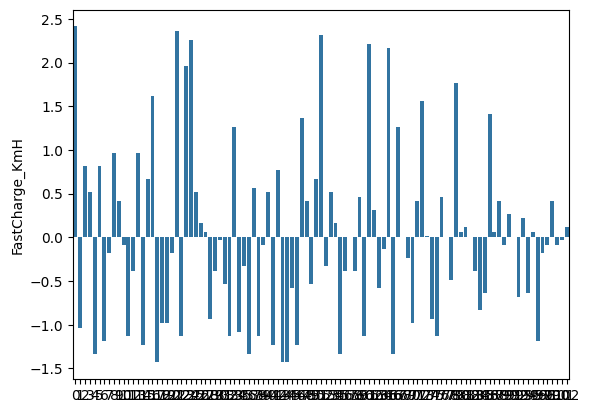

In [30]:
sns.barplot(data_copy['FastCharge_KmH'])

In [31]:
data_copy = simple_impute_data(data_copy, columns=['FastCharge_KmH'], strategy='mean')

In [32]:
data_copy.corr()

,Brand,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Brand,1.000000,0.062730,0.101759,0.088316,-0.195901,2.005140e-01,-1.881370e-01,0.056464,-0.231104,-0.275860,-0.002040,0.089589,-0.036023
AccelSec,0.062730,1.000000,-0.786195,-0.677062,-0.382904,-6.168326e-01,-5.148205e-01,0.521011,-0.259657,-0.347164,-0.451568,-0.175335,-0.627174
TopSpeed_KmH,0.101759,-0.786195,1.000000,0.746662,0.355675,7.450265e-01,2.510541e-01,-0.560538,-0.010110,0.339230,0.670403,0.126470,0.829057
Range_Km,0.088316,-0.677062,0.746662,1.000000,0.313077,6.386739e-01,4.012905e-01,-0.451495,0.131297,0.227477,0.628597,0.300163,0.674844
Efficiency_WhKm,-0.195901,-0.382904,0.355675,0.313077,1.000000,3.046713e-01,1.056728e-01,-0.394721,-0.028761,0.373146,0.623263,0.301230,0.396705
FastCharge_KmH,0.200514,-0.616833,0.745027,0.638674,0.304671,1.000000e+00,1.871948e-17,-0.401034,-0.035994,0.351598,0.583862,0.081404,0.638300
RapidCharge,-0.188137,-0.514820,0.251054,0.401290,0.105673,1.871948e-17,1.000000e+00,-0.274797,0.539160,0.223577,0.189954,0.423111,0.197208
PowerTrain,0.056464,0.521011,-0.560538,-0.451495,-0.394721,-4.010342e-01,-2.747969e-01,1.000000,-0.039763,-0.349484,-0.497850,-0.278882,-0.561584
PlugType,-0.231104,-0.259657,-0.010110,0.131297,-0.028761,-3.599422e-02,5.391604e-01,-0.039763,1.000000,0.066463,-0.163959,-0.029570,-0.000193
BodyStyle,-0.275860,-0.347164,0.339230,0.227477,0.373146,3.515981e-01,2.235768e-01,-0.349484,0.066463,1.000000,0.415428,0.342489,0.321713


In [213]:
data.isnull().sum()

Brand              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [214]:
print(data_copy.dtypes)

Brand                int64
AccelSec           float64
TopSpeed_KmH         int64
Range_Km           float64
Efficiency_WhKm    float64
FastCharge_KmH     float64
RapidCharge          int64
PowerTrain           int64
PlugType             int64
BodyStyle            int64
Segment              int64
Seats                int64
PriceEuro            int64
dtype: object


In [215]:
features = data_copy.drop(columns='PriceEuro', axis=1)
target = data_copy['PriceEuro']

In [216]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [217]:
print(f"{x_train.shape}")
print(f"{x_test.shape}")
print(f"{y_train.shape}")
print(f"{y_test.shape}")

(82, 12)
(21, 12)
(82,)
(21,)


## Initialize the DecisionTreeRegressor model, and use the fit function for training the model.

Add values for the parameters max_depth, min_samples_split, and max_features.

Fit the model using the fit function


In [ ]:
model1 = DecisionTreeRegressor(max_depth=10, min_samples_split=5, max_features='sqrt')
#min_samples_split - The minimum number of samples required to split an internal node.
#max_features - The number of features to consider when looking for the best split.

## Predict the outcomes for X test

In [219]:
model1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_split=5)

In [220]:
y_pred = model1.predict(x_test)

## Assess the model performance, by using sklearn metrics for regression

In [221]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [222]:
print(f"Mean absolute error: {mae}")
"""
It tells us the average amount that the predictions differ from the actual values, 
ignoring whether the errors are positive or negative. 
It's like asking, "On average, how much is the model off?"
"""
print(f"Mean square error: {mse}")
"""
How far off your predictions are on average, 
but instead of just taking the errors directly, it squares them.
It hightlights the error by squaring it.

"""
print(f"R2 score: {r2}")
"""
Explains how much better the model is than just predicting the average of the target values.
"""

Mean absolute error: 9886.5873015873
Mean square error: 199594912.30320105
R2 score: 0.7363716010498746


'\nExplains how much better the model is than just predicting the average of the target values.\n'

## Initialize the XGBRegressor model, and use the fit function

Add values for the parameters: n_estimators, max_depth, learning_rate, and set the objective to "reg:squarederror"

Fit the model using the fit function

In [235]:
model2 = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, objective='reg:squarederror')

## Predict the outcomes for X test

In [236]:
model2.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [237]:
y_pred = model2.predict(x_test)

## Assess the model performance, by using sklearn metrics for regression

In [238]:
mae_xgb = mean_absolute_error(y_test, y_pred)
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

In [239]:
print(f"Mean absolute error: {mae_xgb}")
print(f"Mean square error: {mse_xgb}")
print(f"R2 score: {r2_xgb}")

Mean absolute error: 6294.419270833333
Mean square error: 85270513.56303042
R2 score: 0.8873732089996338


## Compare the performances of both model for at least three regression metircs

In [240]:
print(f"MAE: [DecisionTreeRegressor]: {mae}")
print(f"MSE: [DecisionTreeRegressor]: {mse}")
print(f"R2: [DecisionTreeRegressor]: {r2}")
print("---------------------------------")
print(f"MAE: [XGBoostRegressor]: {mae_xgb}")
print(f"MSE: [XGBoostRegressor]: {mse_xgb}")
print(f"R2: [XGBoostRegressor]: {r2_xgb}")

MAE: [DecisionTreeRegressor]: 9886.5873015873
MSE: [DecisionTreeRegressor]: 199594912.30320105
R2: [DecisionTreeRegressor]: 0.7363716010498746
---------------------------------
MAE: [XGBoostRegressor]: 6294.419270833333
MSE: [XGBoostRegressor]: 85270513.56303042
R2: [XGBoostRegressor]: 0.8873732089996338


### XGBOOST better -> high r2, and lower MAE, MSE